<img src="https://www3.um.edu.uy/logoum.jpg" width=300>
<h1 align="center">Thesis - Explanation</h1> 
<h2 align="center">Alejo Paullier</h2> 

https://lkpy.lenskit.org/en/stable/knn.html

In [1]:
from lenskit import batch, topn, util
from lenskit import crossfold as xf
from lenskit.algorithms import Recommender
from lenskit.algorithms.hpf import HPF as hpfl
from lenskit.metrics.predict import mae
import pandas as pd
import numpy as np
from hpfrec import HPF
from hyperopt import fmin, tpe, hp, STATUS_OK

ratings = pd.read_csv('C:\\Users\\Alejo\\Tesis\\Demo\\ml-100k\\u.data', sep='\t',
                      names=['user', 'item', 'rating', 'timestamp'])


def eval(aname, algo, train, test):
    fittable = util.clone(algo) # Object cloning means to create an exact copy of the original object.
    fittable = Recommender.adapt(fittable) 
    fittable.fit(train) # train the algorithm with the training dataset
    # Now we run the recommender:
    preds = batch.predict(fittable, test)
    # add the algorithm name for analyzability
    return preds

In [3]:
all_recs = []
test_data = []


hpf = hpfl(10,verbose=False) # define algorithm

for train, test in xf.partition_users(ratings[['user', 'item', 'rating']], 5, xf.SampleFrac(0.2)):
    test_data.append(test) # save testing data
    all_recs.append(eval('HPF', hpf, train, test))

**********************************
Hierarchical Poisson Factorization
**********************************

Number of users: 943
Number of items: 1670
Latent factors to use: 10

Initializing parameters...
Allocating Phi matrix...
Initializing optimization procedure...
Iteration 10 | train llk: -422808 | train rmse: 2.7573
Iteration 20 | train llk: -351527 | train rmse: 2.6138
Iteration 30 | train llk: -329117 | train rmse: 2.5675
Iteration 40 | train llk: -321154 | train rmse: 2.5457
Iteration 50 | train llk: -316845 | train rmse: 2.5301
Iteration 60 | train llk: -313982 | train rmse: 2.5169
Iteration 70 | train llk: -312443 | train rmse: 2.5104
Iteration 80 | train llk: -311435 | train rmse: 2.5066
Iteration 90 | train llk: -310555 | train rmse: 2.5033
Iteration 100 | train llk: -309841 | train rmse: 2.5007


Optimization finished
Final log-likelihood: -309841
Final RMSE: 2.5007
Minutes taken (optimization part): 0.0

**********************************
Hierarchical Poisson Factorization

In [4]:
all_recs = pd.concat(all_recs, ignore_index=True)
all_recs

,user,item,rating,prediction
0,4,258,5,1.761655
1,4,50,5,0.189039
2,4,264,3,0.526022
3,4,301,5,0.968680
4,4,328,3,1.678751
...,...,...,...,...
19995,939,841,4,0.166881
19996,939,275,4,1.415619
19997,939,274,5,1.093456
19998,939,258,4,1.619915


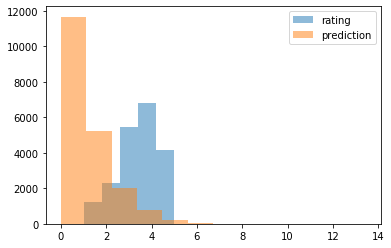

In [14]:
from matplotlib import pyplot

x = all_recs['rating']
y = all_recs['prediction']

pyplot.hist(x, bins = 5,alpha=0.5, label='rating')
pyplot.hist(y, bins = 12,alpha=0.5, label='prediction')
pyplot.legend(loc='upper right')
pyplot.show()